# Weather Prediction Model

In [1]:
import pandas as pd

In [2]:
weather = pd.read_csv('Mumbai_1990_2022_Santacruz.csv', index_col="time")

In [3]:
weather

,tavg,tmin,tmax,prcp
time,,,,
01-01-1990,23.2,17.0,NaN,0.0
02-01-1990,22.2,16.5,29.9,0.0
03-01-1990,21.8,16.3,30.7,0.0
04-01-1990,25.4,17.9,31.8,0.0
05-01-1990,26.5,19.3,33.7,0.0
...,...,...,...,...
21-07-2022,27.6,25.6,30.5,10.9
22-07-2022,28.3,26.0,30.5,3.0
23-07-2022,28.2,25.8,31.3,5.1


# Cleaning the data

In [4]:
weather.apply(pd.isnull).sum()/weather.shape[0]

tavg    0.000925
tmin    0.206323
tmax    0.160333
prcp    0.393560
dtype: float64

In [39]:
core_weather = weather[["prcp","tmax","tmin","tavg"]].copy()

In [40]:
core_weather

,prcp,tmax,tmin,tavg
time,,,,
01-01-1990,0.0,NaN,17.0,23.2
02-01-1990,0.0,29.9,16.5,22.2
03-01-1990,0.0,30.7,16.3,21.8
04-01-1990,0.0,31.8,17.9,25.4
05-01-1990,0.0,33.7,19.3,26.5
...,...,...,...,...
21-07-2022,10.9,30.5,25.6,27.6
22-07-2022,3.0,30.5,26.0,28.3
23-07-2022,5.1,31.3,25.8,28.2


In [41]:
core_weather.columns = ["precip","temp_max","temp_min","temp_avg"]

In [42]:
core_weather.apply(pd.isnull).sum() / core_weather.shape[0]

precip      0.393560
temp_max    0.160333
temp_min    0.206323
temp_avg    0.000925
dtype: float64

In [43]:
core_weather["precip"].value_counts()

0.0     3954
2.0      178
3.0      176
1.0      161
0.3      154
        ... 
42.4       1
25.7       1
38.9       1
69.9       1
16.3       1
Name: precip, Length: 371, dtype: int64

In [44]:
core_weather[pd.isnull(core_weather["precip"])]

,precip,temp_max,temp_min,temp_avg
time,,,,
21-05-1990,NaN,34.5,27.3,29.9
26-05-1990,NaN,NaN,NaN,NaN
27-05-1990,NaN,NaN,NaN,NaN
28-05-1990,NaN,NaN,NaN,NaN
29-05-1990,NaN,NaN,NaN,NaN
...,...,...,...,...
30-12-2020,NaN,30.0,16.8,25.0
31-12-2020,NaN,33.6,18.5,27.1
01-01-2021,NaN,32.4,20.6,27.7


In [45]:
core_weather.loc["21-05-1990":"21-06-1990",:]

C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\indexing.py:1180: UserWarning: Parsing '21-05-1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._get_slice_axis(key, axis=axis)
C:\Users\ASUS\anaconda3\lib\site-packages\pandas\core\indexing.py:1180: UserWarning: Parsing '21-06-1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._get_slice_axis(key, axis=axis)


,precip,temp_max,temp_min,temp_avg
time,,,,
21-05-1990,NaN,34.5,27.3,29.9
22-05-1990,0.8,34.2,26.3,30.5
23-05-1990,2.5,34.4,27.5,31.1
24-05-1990,0.0,34.2,28.0,31.3
25-05-1990,0.0,34.5,28.2,30.8
26-05-1990,NaN,NaN,NaN,NaN
27-05-1990,NaN,NaN,NaN,NaN
28-05-1990,NaN,NaN,NaN,NaN
29-05-1990,NaN,NaN,NaN,NaN


# Removing the null values using forward fill

In [46]:
core_weather = core_weather.fillna(method="ffill")

In [47]:
core_weather

,precip,temp_max,temp_min,temp_avg
time,,,,
01-01-1990,0.0,NaN,17.0,23.2
02-01-1990,0.0,29.9,16.5,22.2
03-01-1990,0.0,30.7,16.3,21.8
04-01-1990,0.0,31.8,17.9,25.4
05-01-1990,0.0,33.7,19.3,26.5
...,...,...,...,...
21-07-2022,10.9,30.5,25.6,27.6
22-07-2022,3.0,30.5,26.0,28.3
23-07-2022,5.1,31.3,25.8,28.2


In [48]:
core_weather["temp_max"] = core_weather["temp_max"].fillna(method="ffill")

In [49]:
core_weather = core_weather.dropna()

In [50]:
core_weather

,precip,temp_max,temp_min,temp_avg
time,,,,
02-01-1990,0.0,29.9,16.5,22.2
03-01-1990,0.0,30.7,16.3,21.8
04-01-1990,0.0,31.8,17.9,25.4
05-01-1990,0.0,33.7,19.3,26.5
06-01-1990,0.0,33.5,19.8,25.1
...,...,...,...,...
21-07-2022,10.9,30.5,25.6,27.6
22-07-2022,3.0,30.5,26.0,28.3
23-07-2022,5.1,31.3,25.8,28.2


# Checking the number of null values

In [51]:
core_weather.apply(pd.isnull).sum() / core_weather.shape[0]

precip      0.0
temp_max    0.0
temp_min    0.0
temp_avg    0.0
dtype: float64

In [52]:
core_weather.dtypes

precip      float64
temp_max    float64
temp_min    float64
temp_avg    float64
dtype: object

# Converting Dates to date-time data type

In [53]:
core_weather.index

Index(['02-01-1990', '03-01-1990', '04-01-1990', '05-01-1990', '06-01-1990',
       '07-01-1990', '08-01-1990', '09-01-1990', '10-01-1990', '11-01-1990',
       ...
       '16-07-2022', '17-07-2022', '18-07-2022', '19-07-2022', '20-07-2022',
       '21-07-2022', '22-07-2022', '23-07-2022', '24-07-2022', '25-07-2022'],
      dtype='object', name='time', length=11893)

In [54]:
core_weather.index = pd.to_datetime(core_weather.index)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8388\3501870966.py:1: UserWarning: Parsing '13-01-1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  core_weather.index = pd.to_datetime(core_weather.index)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8388\3501870966.py:1: UserWarning: Parsing '14-01-1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  core_weather.index = pd.to_datetime(core_weather.index)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8388\3501870966.py:1: UserWarning: Parsing '15-01-1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  core_weather.index = pd.to_datetime(core_weather.index)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8388\3501870966.py:1: UserWarning: Parsing '16-01-1990' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  core_weather.index = pd.to_datet

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8388\3501870966.py:1: UserWarning: Parsing '16-07-2003' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  core_weather.index = pd.to_datetime(core_weather.index)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8388\3501870966.py:1: UserWarning: Parsing '17-07-2003' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  core_weather.index = pd.to_datetime(core_weather.index)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8388\3501870966.py:1: UserWarning: Parsing '18-07-2003' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  core_weather.index = pd.to_datetime(core_weather.index)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8388\3501870966.py:1: UserWarning: Parsing '19-07-2003' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  core_weather.index = pd.to_datet

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8388\3501870966.py:1: UserWarning: Parsing '16-06-2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  core_weather.index = pd.to_datetime(core_weather.index)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8388\3501870966.py:1: UserWarning: Parsing '17-06-2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  core_weather.index = pd.to_datetime(core_weather.index)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8388\3501870966.py:1: UserWarning: Parsing '18-06-2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  core_weather.index = pd.to_datetime(core_weather.index)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8388\3501870966.py:1: UserWarning: Parsing '19-06-2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  core_weather.index = pd.to_datet

In [55]:
core_weather.index

DatetimeIndex(['1990-02-01', '1990-03-01', '1990-04-01', '1990-05-01',
               '1990-06-01', '1990-07-01', '1990-08-01', '1990-09-01',
               '1990-10-01', '1990-11-01',
               ...
               '2022-07-16', '2022-07-17', '2022-07-18', '2022-07-19',
               '2022-07-20', '2022-07-21', '2022-07-22', '2022-07-23',
               '2022-07-24', '2022-07-25'],
              dtype='datetime64[ns]', name='time', length=11893, freq=None)

In [56]:
core_weather.index.year

Int64Index([1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990, 1990,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='time', length=11893)

In [57]:
core_weather.apply(lambda x: (x==9999).sum())

precip      0
temp_max    0
temp_min    0
temp_avg    0
dtype: int64

<AxesSubplot:xlabel='time'>

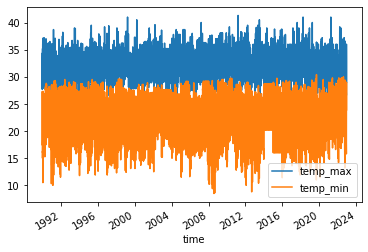

In [58]:
core_weather[["temp_max","temp_min"]].plot()

In [59]:
core_weather.index.year.value_counts().sort_index()

1990    364
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    206
Name: time, dtype: int64

<AxesSubplot:xlabel='time'>

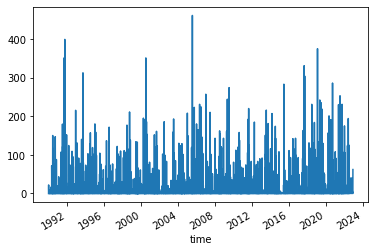

In [60]:
core_weather["precip"].plot()

In [61]:
core_weather.groupby(core_weather.index.year).sum()["precip"]

time
1990    2597.4
1991    2310.9
1992    1913.8
1993    2397.9
1994    2458.4
1995    1728.4
1996    2114.9
1997    1854.0
1998    2546.0
1999    1714.7
2000    2238.5
2001    1960.7
2002    1271.4
2003    2231.2
2004    2179.4
2005    2819.3
2006    2927.8
2007    2293.3
2008    2722.1
2009    2242.8
2010    3357.4
2011    2701.4
2012    2060.8
2013    2452.9
2014    2300.5
2015    1765.8
2016    3036.4
2017    3054.4
2018    2196.5
2019    3565.4
2020    3419.5
2021    3291.9
2022    1479.7
Name: precip, dtype: float64

# Setting Targets for our ML model

In [62]:
core_weather["target"] = core_weather.shift(-1)["temp_max"]

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8388\3381915888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  core_weather["target"] = core_weather.shift(-1)["temp_max"]


In [63]:
core_weather

,precip,temp_max,temp_min,temp_avg,target
time,,,,,
1990-02-01,0.0,29.9,16.5,22.2,30.7
1990-03-01,0.0,30.7,16.3,21.8,31.8
1990-04-01,0.0,31.8,17.9,25.4,33.7
1990-05-01,0.0,33.7,19.3,26.5,33.5
1990-06-01,0.0,33.5,19.8,25.1,33.7
...,...,...,...,...,...
2022-07-21,10.9,30.5,25.6,27.6,30.5
2022-07-22,3.0,30.5,26.0,28.3,31.3
2022-07-23,5.1,31.3,25.8,28.2,30.4


In [64]:
core_weather = core_weather.iloc[:-1,:].copy()

In [65]:
core_weather

,precip,temp_max,temp_min,temp_avg,target
time,,,,,
1990-02-01,0.0,29.9,16.5,22.2,30.7
1990-03-01,0.0,30.7,16.3,21.8,31.8
1990-04-01,0.0,31.8,17.9,25.4,33.7
1990-05-01,0.0,33.7,19.3,26.5,33.5
1990-06-01,0.0,33.5,19.8,25.1,33.7
...,...,...,...,...,...
2022-07-20,11.9,30.5,25.0,27.4,30.5
2022-07-21,10.9,30.5,25.6,27.6,30.5
2022-07-22,3.0,30.5,26.0,28.3,31.3


# Applying Machine Learning Algorithm Ridge

In [66]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [67]:
predictors = ["precip","temp_max","temp_min","temp_avg"]

In [69]:
train = core_weather.loc[:"2020-12-31"]

In [70]:
test = core_weather.loc["2021-01-01":]

In [71]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [72]:
predictions = reg.predict(test[predictors])

In [74]:
# Checking for absolute mean error i.e. by how many degrees we were off from target

In [75]:
from sklearn.metrics import mean_absolute_error

In [76]:
mean_absolute_error(test["target"], predictions)

1.0380258308258021

In [77]:
# As you can see above we were about 1 degree off from our target temperatures

# Evaluating the model

In [80]:
combined = pd.concat([test["target"], pd.Series(predictions, index = test.index)], axis = 1)
combined.columns = ["Actual", "Predictions"]

In [81]:
combined

,Actual,Predictions
time,,
2021-01-01,30.0,32.569703
2021-02-01,28.2,30.251916
2021-03-01,29.0,29.143923
2021-04-01,29.0,29.635189
2021-05-01,30.0,29.648405
...,...,...
2022-07-20,30.5,30.752908
2022-07-21,30.5,30.744189
2022-07-22,31.3,30.878632


<AxesSubplot:xlabel='time'>

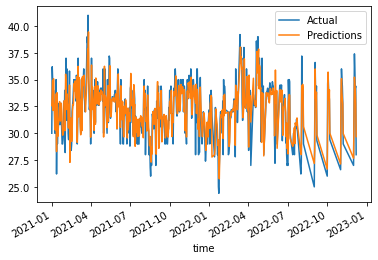

In [82]:
combined.plot()

In [83]:
reg.coef_

array([-0.0016389 ,  0.69527606, -0.0927932 ,  0.2265899 ])

# Creating a Function to make predictions

In [84]:
def create_predictions (predictors , core_weather, reg):
    train = core_weather.loc[:"2020-12-31"]
    test = core_weather.loc["2021-01-01":]
    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test["target"], predictions)
    combined = pd.concat([test["target"], pd.Series(predictions, index = test.index)], axis = 1)
    combined.columns = ["Actual", "Predictions"]
    return error, combined

# Adding Rolling Means to improve Accuracy

In [87]:
core_weather["month_max"] = core_weather["temp_max"].rolling(30).mean()

In [88]:
core_weather

,precip,temp_max,temp_min,temp_avg,target,month_max
time,,,,,,
1990-02-01,0.0,29.9,16.5,22.2,30.7,NaN
1990-03-01,0.0,30.7,16.3,21.8,31.8,NaN
1990-04-01,0.0,31.8,17.9,25.4,33.7,NaN
1990-05-01,0.0,33.7,19.3,26.5,33.5,NaN
1990-06-01,0.0,33.5,19.8,25.1,33.7,NaN
...,...,...,...,...,...,...
2022-07-20,11.9,30.5,25.0,27.4,30.5,30.036667
2022-07-21,10.9,30.5,25.6,27.6,30.5,30.033333
2022-07-22,3.0,30.5,26.0,28.3,31.3,29.960000


In [89]:
core_weather["month_day_max"] = core_weather["month_max"]/ core_weather["temp_max"]

In [91]:
core_weather["max_min"] = core_weather["temp_max"]/ core_weather["temp_min"]

In [92]:
core_weather

,precip,temp_max,temp_min,temp_avg,target,month_max,month_day_max,max_min
time,,,,,,,,
1990-02-01,0.0,29.9,16.5,22.2,30.7,NaN,NaN,1.812121
1990-03-01,0.0,30.7,16.3,21.8,31.8,NaN,NaN,1.883436
1990-04-01,0.0,31.8,17.9,25.4,33.7,NaN,NaN,1.776536
1990-05-01,0.0,33.7,19.3,26.5,33.5,NaN,NaN,1.746114
1990-06-01,0.0,33.5,19.8,25.1,33.7,NaN,NaN,1.691919
...,...,...,...,...,...,...,...,...
2022-07-20,11.9,30.5,25.0,27.4,30.5,30.036667,0.984809,1.220000
2022-07-21,10.9,30.5,25.6,27.6,30.5,30.033333,0.984699,1.191406
2022-07-22,3.0,30.5,26.0,28.3,31.3,29.960000,0.982295,1.173077


In [93]:
predictors = ["precip","temp_max","temp_min","temp_avg","month_max","month_day_max","max_min"]

In [94]:
core_weather = core_weather.iloc[30:,:].copy()

In [95]:
error, combined = create_predictions (predictors , core_weather, reg)

In [96]:
error

1.0104142991674963

<AxesSubplot:xlabel='time'>

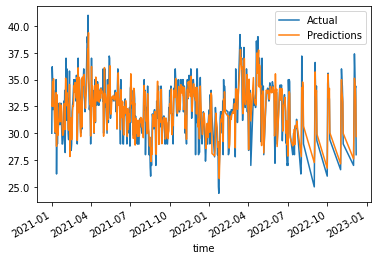

In [97]:
combined.plot()

In [99]:
core_weather["monthly_avg"] = core_weather["temp_max"].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())

In [101]:
core_weather

,precip,temp_max,temp_min,temp_avg,target,month_max,month_day_max,max_min,monthly_avg
time,,,,,,,,,
1990-01-02,0.0,31.1,17.5,24.2,31.1,33.970000,1.092283,1.777143,31.100000
1990-02-02,0.0,31.1,16.0,23.2,32.6,33.983333,1.092712,1.943750,31.100000
1990-03-02,0.0,32.6,15.4,24.8,33.3,34.010000,1.043252,2.116883,32.600000
1990-04-02,0.0,33.3,15.7,23.8,33.2,33.996667,1.020921,2.121019,33.300000
1990-05-02,0.0,33.2,15.3,24.0,37.0,33.986667,1.023695,2.169935,33.200000
...,...,...,...,...,...,...,...,...,...
2022-07-20,11.9,30.5,25.0,27.4,30.5,30.036667,0.984809,1.220000,31.079523
2022-07-21,10.9,30.5,25.6,27.6,30.5,30.033333,0.984699,1.191406,31.078947
2022-07-22,3.0,30.5,26.0,28.3,31.3,29.960000,0.982295,1.173077,31.078373


In [102]:
core_weather["day_of_year_avg"] = core_weather["temp_max"].groupby(core_weather.index.day_of_year).apply(lambda x: x.expanding(1).mean())

In [104]:
core_weather

,precip,temp_max,temp_min,temp_avg,target,month_max,month_day_max,max_min,monthly_avg,day_of_year_avg
time,,,,,,,,,,
1990-01-02,0.0,31.1,17.5,24.2,31.1,33.970000,1.092283,1.777143,31.100000,31.100000
1990-02-02,0.0,31.1,16.0,23.2,32.6,33.983333,1.092712,1.943750,31.100000,31.100000
1990-03-02,0.0,32.6,15.4,24.8,33.3,34.010000,1.043252,2.116883,32.600000,32.600000
1990-04-02,0.0,33.3,15.7,23.8,33.2,33.996667,1.020921,2.121019,33.300000,33.300000
1990-05-02,0.0,33.2,15.3,24.0,37.0,33.986667,1.023695,2.169935,33.200000,33.200000
...,...,...,...,...,...,...,...,...,...,...
2022-07-20,11.9,30.5,25.0,27.4,30.5,30.036667,0.984809,1.220000,31.079523,30.439394
2022-07-21,10.9,30.5,25.6,27.6,30.5,30.033333,0.984699,1.191406,31.078947,30.527273
2022-07-22,3.0,30.5,26.0,28.3,31.3,29.960000,0.982295,1.173077,31.078373,30.487879


In [108]:
predictors = ["precip","temp_max","temp_min","temp_avg","month_max","month_day_max","max_min", "day_of_year_avg","monthly_avg"]

In [109]:
error, combined = create_predictions (predictors , core_weather, reg)

In [110]:
error

1.0032321043683126

# Running Model Diagnosis

In [112]:
reg.coef_

array([-0.00115195,  0.61127063, -0.0684994 ,  0.21371527,  0.06135476,
        0.46896345,  0.21595407,  0.16238714,  0.00828894])

In [113]:
core_weather.corr()["target"]

precip            -0.265104
temp_max           0.815485
temp_min           0.086654
temp_avg           0.531691
target             1.000000
month_max          0.533363
month_day_max     -0.554561
max_min            0.192833
monthly_avg        0.371864
day_of_year_avg    0.610422
Name: target, dtype: float64

In [117]:
combined["diff"] = (combined["Actual"] - combined["Predictions"]).abs()

In [118]:
combined.sort_values("diff", ascending = False).head()

,Actual,Predictions,diff
time,,,
2021-11-30,28.0,33.097411,5.097411
2022-03-22,38.0,33.261840,4.738160
2022-04-20,38.6,33.921505,4.678495
2022-01-22,25.0,29.272621,4.272621
2021-05-16,32.0,36.252224,4.252224


# Checking Accuracy of the Model

In [119]:
x = combined["Actual"].mean()
print(x)

32.26631578947368


In [123]:
error_percent = (error/x)*100
print(error_percent)

3.1092242167158095


In [124]:
Accuracy = 100-error_percent
print(Accuracy)

96.89077578328418


In [ ]:
'''We can diagnose even further and try to eliminate these innacuracies by adding different parameters to predictors and data 
from other weather stations as well to improve i.e. reduce aboslute mean error'''